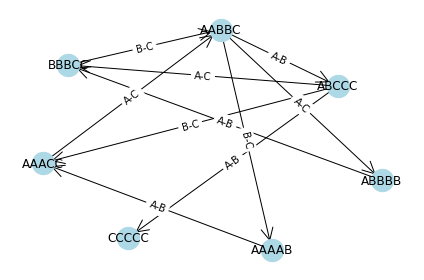

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def get_transitions(state):
   
    transitions = []
    a, b, c = state
    if a > 0 and b > 0:
        transitions.append(((a - 1, b - 1, c + 2), "A-B"))
    if a > 0 and c > 0:
        transitions.append(((a - 1, b + 2, c - 1), "A-C"))
    if b > 0 and c > 0:
        transitions.append(((a + 2, b - 1, c - 1), "B-C"))
    return transitions

def build_graph(initial_state):
    
    G = nx.DiGraph()
    queue = [initial_state]
    visited = {initial_state}
    
    while queue:
        state = queue.pop(0)
        for new_state, label in get_transitions(state):
            G.add_edge(state, new_state, label=label)
            if new_state not in visited:
                visited.add(new_state)
                queue.append(new_state)
    return G

def state_to_string(state):
    
    a, b, c = state
    return "A" * a + "B" * b + "C" * c

def draw_graph(G):
    
    plt.figure(figsize=(6, 4))
    pos = nx.spring_layout(G, seed=50, k=7.5)
    
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=30)
    
    # Use the sorted particle string as the label.
    node_labels = {node: state_to_string(node) for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12)
    
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    initial_state_str = "AAAAB"
    initial_state = (
        initial_state_str.count('A'),
        initial_state_str.count('B'),
        initial_state_str.count('C')
    )
    
    G = build_graph(initial_state)
    draw_graph(G)


In [4]:
import random

def third_species(x, y):
    return ({"A", "B", "C"} - {x, y}).pop()

def simulate_collision(initial_state, max_steps=100000):
    state = list(initial_state)
    
    for _ in range(max_steps):
        if len(set(state)) == 1:
            return "uniform"
        
        i, j = random.sample(range(len(state)), 2)
        if state[i] != state[j]:
            new_species = third_species(state[i], state[j])
            state[i] = new_species
            state[j] = new_species

    return "cycle"

def run_simulations(n, num_simulations=100000):
    outcomes = {"uniform": 0, "cycle": 0}
    for _ in range(num_simulations):
        state = [random.choice(["A", "B", "C"]) for _ in range(n)]
        outcome = simulate_collision(state)
        outcomes[outcome] += 1
    return outcomes

def main():
    try:
        n = int(input("Enter the number of starting particles (n): "))
    except ValueError:
        print("Invalid input. Using n = 3.")
        n = 3
        
    try:
        num_simulations = int(input("Enter the number of simulations: "))
    except ValueError:
        print("Invalid input. Using 100000 simulations.")
        num_simulations = 100000
        
    outcomes = run_simulations(n, num_simulations)
    uniform_prob = outcomes["uniform"] / num_simulations
    cycle_prob = outcomes["cycle"] / num_simulations
    
    print(f"\nAfter {num_simulations} simulations for n = {n}:")
    print(f"  End point: {outcomes['uniform']} times, probability ≈ {uniform_prob:.3f}")
    print(f"  Infinite: {outcomes['cycle']} times, probability ≈ {cycle_prob:.3f}")

if __name__ == "__main__":
    main()


Enter the number of starting particles (n):  3
Enter the number of simulations:  1000



After 1000 simulations for n = 3:
  End point: 317 times, probability ≈ 0.317
  Infinite: 683 times, probability ≈ 0.683
